Data Science Fundamentals: Python |
[Table of Contents](../index.ipynb)
- - - 
<!--NAVIGATION-->
Module 12. | 
[Introduction to Scikit-Learn](./01-Introduction-To-Scikit-Learn.ipynb) | [Support Vector Machines](./02-Support-Vector-Machines.ipynb) | [Decision Trees and Random Forests](./03-Random-Forests.ipynb) | [Feature Engineering](./05_feature-engineering.ipynb) | [PythonDataScienceHandbook-JakeVDP](../PythonDataScienceHandbook-JakeVDP/notebooks/)


- - -

[Tutorials](./04-Tutorials.ipynb) | [Practice Exercises](./06-PracticeExercises.ipynb)

- - -

[Iris Dataset Exercises](./07-IrisDatasetExercises.ipynb) | [Iris Dataset Project Reference](./08-Iris_Dataset_Project_Reference.ipynb)

# Practice Exercises

**For Practice using GitHub and Python: Complete every exercise in the Basic and Visualization, K-Nearest Neighbors Algorithm, and Logistic Regression sections.  Put every solution in its own file and push a folder containing all of your code to a Github repo. Submit the URL for that repo.**

### [Python Machine Learning Iris flower Data Set](https://www.w3resource.com/machine-learning/scikit-learn/iris/index.php)

Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

The best way we learn anything is by practice and exercise questions. We have started this section for those (beginner to intermediate) who are familiar with Python, Scikit-learn. Hope, these exercises help you to improve your Machine learning skills using Scikit-learn. Currently, data set are available, we are working hard to add more exercises.

#### Iris Flower Data Set

From Wikipedia - The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus"


![image](images/iris.png)

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

## A. Basic - Iris flower data set 

### Exercise 0.

Get the imports that you may need here:

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn import decomposition
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

### Exercise 1.

Write a Python program to load the iris data from a given csv file (or this direct [url](http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)) into a dataframe and print the shape of the data, type of the data and first 3 rows.

```files/exercise_A.1.py```

In [43]:
#Data URL location
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
#Renaming the columns with specific names
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
#reading the data into the 'dataset' variable for access
dataset = pd.read_csv(url, names = attributes)

In [51]:
# import pandas as pd
# data = pd.read_csv(url)
# print("The shape of the data:")
dataset.shape
# print("\nData Type:")
# print(type(data))
# print("\nPrint first 3")
# print(data.head(3))
dataset.head(3)


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


### Exercise 2. 

Write a Python program using Pandas to print the keys, number of rows-columns, feature names and the description of the Iris data. 

```files/exercise_A.2.py```

In [53]:
# print("Keys:")
# print(data.keys)
# print("Rows x Columns")
# print(data.shape)
# print("Feature Names:")
# print(data.columns)
# print("Desription")
# print(data.describe)
dataset.keys()
dataset.shape
dataset.columns
dataset.dtypes
dataset.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

### Exercise 3. 

Write a Python program to get the number of observations, missing values and nan values.

```files/exercise_A.3.py```

In [54]:
#print(data.info()) #using the parentheses makes a difference because it gives an arguement
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Exercise 4.

Write a Python program to create a 2-D array with ones on the diagonal and zeros elsewhere. Now convert the NumPy array to a SciPy sparse matrix in CSR format. 

From Wikipedia:

```In numerical analysis and scientific computing, a sparse matrix or sparse array is a matrix in which most of the elements are zero. By contrast, if most of the elements are nonzero, then the matrix is considered dense. The number of zero-valued elements divided by the total number of elements (e.g., m x n for an m x n matrix) is called the sparsity of the matrix (which is equal to 1 minus the density of the matrix). Using those definitions, a matrix will be sparse when its sparsity is greater than 0.5.```

```files/exercise_A.4.py```

In [21]:
import numpy as np
from scipy import sparse
#creates numpy array and assigns it to the data set
eye=np.eye(4)
#converts numpy to scipy sparse to CSR format
matrix=sparse.csr_matrix(eye)
print("\nNumpy to Scipy CSR\n",matrix)





Numpy to Scipy CSR
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
              5.1         3.5         1.4         0.2
count  149.000000  149.000000  149.000000  149.000000
mean     5.848322    3.051007    3.774497    1.205369
std      0.828594    0.433499    1.759651    0.761292
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.400000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000


### Exercise 5.

Write a Python program to view basic statistical details like percentile, mean, std etc. of iris data.

```files/exercise_A.5.py```

In [69]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Exercise 6. 

Write a Python program to view basic statistical details like percentile, mean, std etc. of iris data.

In [91]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Exercise 8.

Write a Python program to access first four cells from a given Dataframe using the index and column labels. Call iris.csv to create the Dataframe.

```files/exercise_A.8.py```

In [92]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## B. Visualization - Iris flower data set

### Exercise 1.

Write a Python program to create a plot to get a general Statistics of Iris data.

```files/exercise_B.1.py```

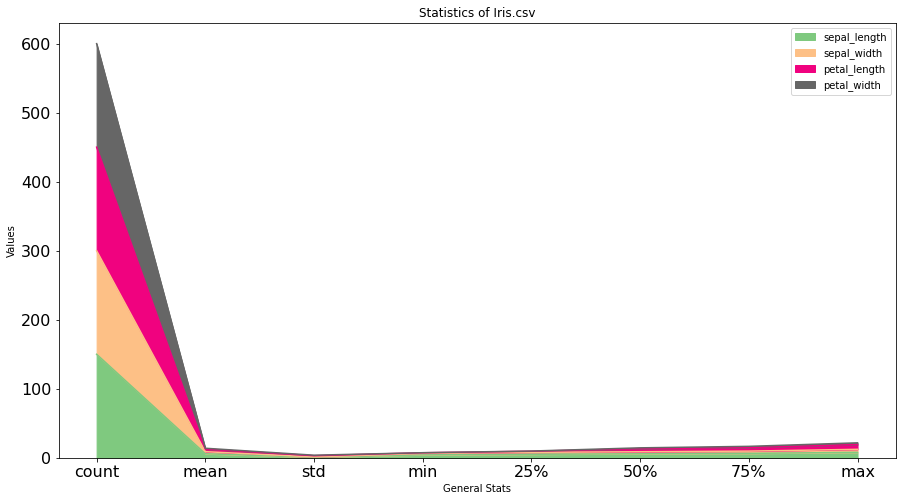

In [60]:
dataset.describe().plot(kind="area", fontsize= 16, figsize=(15,8), table=False, colormap="Accent")
plt.xlabel('General Stats')
plt.ylabel('Values')
plt.title("Statistics of Iris.csv")
plt.show()

### Exercise 2. 

Write a Python program to create a Bar plot to get the frequency of the three species of the Iris data.

```files/exercise_B.2.py```

AttributeError: 'Rectangle' object has no property 'autopct'

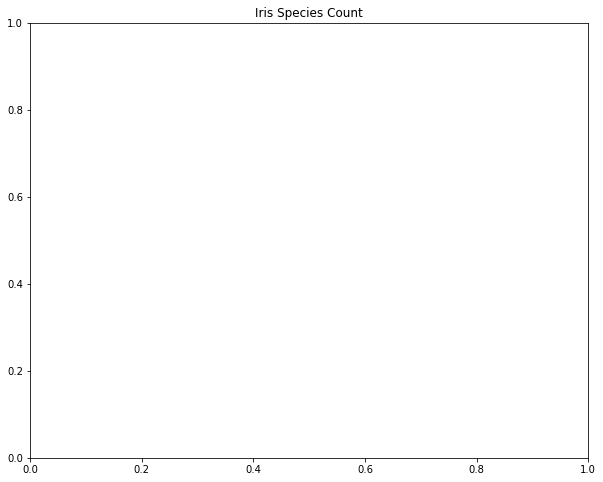

In [99]:

ax=plt.subplots(1,1,figsize=(10,8))
plt.title("Iris Species Count")
dataset['species'].value_counts().plot.bar(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()


### Exercise 3. 

Write a Python program to create a Pie plot to get the frequency of the three species of the Iris data.

```files/exercise_B.3.py```

### Exercise 4. 

 Write a Python program to create a graph to find relationship between the sepal length and width.

```files/exercise_B.4.py```

### Exercise 5.

Write a Python program to create a graph to find relationship between the petal length and width.

```files/exercise_B.5.py```

### Exercise 6.

Write a Python program to create a graph to see how the length and width of SepalLength, SepalWidth, PetalLength, PetalWidth are distributed.

```files/exercise_B.6.py```

### Exercise 7.

Write a Python program to create a joinplot to describe individual distributions on the same plot between Sepal length and Sepal width. Note: joinplot - Draw a plot of two variables with bivariate and univariate graphs.

```files/exercise_B.7.py```

### Exercise 8. 

Write a Python program to create a joinplot using "hexbin" to describe individual distributions on the same plot between Sepal length and Sepal width.  Note: The bivariate analogue of a histogram is known as a "hexbin" plot, because it shows the counts of observations that fall within hexagonal bins. This plot works best with relatively large datasets. It's available through the matplotlib plt.hexbin function and as a style in jointplot(). It looks best with a white background.

```files/exercise_B.8.py```

### Exercise 9. 

Write a Python program to create a joinplot using "kde" to describe individual distributions on the same plot between Sepal length and Sepal width. Note:  The kernel density estimation (kde) procedure visualize a bivariate distribution. In seaborn, this kind of plot is shown with a contour plot and is available as a style in jointplot().

```files/exercise_B.9.py```

### Exercise 10. 

Write a Python program to create a joinplot and add regression and kernel density fits using "reg" to describe individual distributions on the same plot between Sepal length and Sepal width.

```files/exercise_B.10.py```

### Exercise 11.

Write a Python program to draw a scatterplot, then add a joint density estimate to describe individual distributions on the same plot between Sepal length and Sepal width.

```files/exercise_B.11.py```

### Exercise 12.

Write a Python program to create a joinplot using "kde" to describe individual distributions on the same plot between Sepal length and Sepal width and use '+' sign as marker.  Note:  The kernel density estimation (kde) procedure visualize a bivariate distribution. In seaborn, this kind of plot is shown with a contour plot and is available as a style in jointplot().

```files/exercise_B.12.py```

### Exercise 13. 

Write a Python program to create a pairplot of the iris data set and check which flower species seems to be the most separable.

```files/exercise_B.13.py```

### Exercise 14.

 Write a Python program using seaborn to Create a kde (Kernel Density Estimate ) plot of sepal_length versus sepal width for setosa species of flower.

```files/exercise_B.14.py```

### Exercise 15.

Write a Python program using seaborn to Create a kde (Kernel Density Estimate ) plot of petal_length versus petal width for setosa species of flower.

```files/exercise_B.15.py```

### Exercise 16.

Write a Python program using seaborn to Create a kde (Kernel Density Estimate ) plot of petal_length versus petal width for setosa species of flower.

```files/exercise_B.16.py```

### Exercise 17.

Write a Python program to find the correlation between variables of iris data. Also create a hitmap using Seaborn to present their relations.

```files/exercise_B.17.py```

### Exercise 18.

Write a Python program to create a box plot (or box-and-whisker plot) which shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable of iris dataset. Use seaborn. 

```files/exercise_B.18.py```

### Exercise 19.

From Wikipedia -

```Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors (each being a linear combination of the variables and containing n observations) are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables.```  

Write a Python program to create a Principal component analysis (PCA) of iris dataset.

```files/exercise_B.19.py```

## C. K-Nearest Neighbors Algorithm in Iris flower data set

From Wikipedia,

```In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression.[1] In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:```

- itemscope itemtype="http://schema.org/WebPageElement/Heading"> In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
- itemscope itemtype="http://schema.org/WebPageElement/Heading"> In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.

![image](images/neighbors.png)

Example of k-NN classification. The test sample (green dot) should be classified either to blue squares or to red triangles. If k = 3 (solid line circle) it is assigned to the red triangles because there are 2 triangles and only 1 square inside the inner circle. If k = 5 (dashed line circle) it is assigned to the blue squares (3 squares vs. 2 triangles inside the outer circle).

### Exercise 1.

Write a Python program to split the iris dataset into its attributes (X) and labels (y). The X variable contains the first four columns (i.e. attributes) and y contains the labels of the dataset.

```files/exercise_C.1.py```

### Exercise 2.

Write a Python program using Scikit-learn to split the iris dataset into 70% train data and 30% test data. Out of total 150 records, the training set will contain 120 records and the test set contains 30 of those records. Print both datasets.

```files/exercise_C.2.py```

### Exercise 3.

Write a Python program using Scikit-learn to convert Species columns in a numerical column of the iris dataframe. To encode this data map convert each value to a number. e.g. Iris-setosa:0, Iris-versicolor:1, and Iris-virginica:2. Now print the iris dataset into 80% train data and 20% test data. Out of total 150 records, the training set will contain 120 records and the test set contains 30 of those records. Print both datasets.

```files/exercise_C.3.py```

### Exercise 4.

Write a Python program using Scikit-learn to split the iris dataset into 70% train data and 30% test data. Out of total 150 records, the training set will contain 105 records and the test set contains 45 of those records. Predict the response for test dataset (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm) using the K Nearest Neighbor Algorithm. Use 5 as number of neighbors.

```files/exercise_C.4.py```

### Exercise 5.

Write a Python program using Scikit-learn to split the iris dataset into 80% train data and 20% test data. Out of total 150 records, the training set will contain 120 records and the test set contains 30 of those records. Train or fit the data into the model and calculate the accuracy of the model using the K Nearest Neighbor Algorithm.

```files/exercise_C.5.py```

### Exercise 6.

Write a Python program using Scikit-learn to split the iris dataset into 80% train data and 20% test data. Out of total 150 records, the training set will contain 120 records and the test set contains 30 of those records. Train or fit the data into the model and using the K Nearest Neighbor Algorithm calculate the performance for different values of k.

```files/exercise_C.6.py```

### Exercise 7.

Write a Python program using Scikit-learn to split the iris dataset into 80% train data and 20% test data. Out of total 150 records, the training set will contain 120 records and the test set contains 30 of those records. Train or fit the data into the model and using the K Nearest Neighbor Algorithm and create a plot to present the performance for different values of k.

```files/exercise_C.7.py```

### Exercise 8.

Write a Python program using Scikit-learn to split the iris dataset into 80% train data and 20% test data. Out of total 150 records, the training set will contain 120 records and the test set contains 30 of those records. Train or fit the data into the model and using the K Nearest Neighbor Algorithm and create a plot of k values vs accuracy.

```files/exercise_C.8.py```

## D. Logistic Regression in Sci-Kit Learn

### Exercise 1.

Write a Python program to view some basic statistical details like percentile, mean, std etc. of the species of 'Iris-setosa', 'Iris-versicolor' and 'Iris-versicolor'.

```files/exercise_D.1.py```

### Exercise 2.

Write a Python program to create a scatter plot using sepal length and petal_width to separate the Species classes.

```files/exercise_D.2.py```

### Exercise 3.

In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships among variables. It includes many techniques for modeling and analyzing several variables, when the focus is on the relationship between a dependent variable and one or more independent variables (or 'predictors'). Write a Python program to get the accuracy of the Logistic Regression.

```files/exercise_D.3.py```